# 1. Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# System
import os

# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter

# NLP
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Preprocessing
from sklearn import preprocessing
from sklearn.utils import class_weight as cw
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from bs4 import BeautifulSoup

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

# Deep Learning Preprocessing - Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

# Deep Learning Model - Keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

# Deep Learning Model - Keras - CNN
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout, BatchNormalization, Dense, Embedding

# Deep Learning Model - Keras - RNN
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional

# Deep Learning Model - Keras - General
from tensorflow.keras.layers import Input, Add, concatenate, Dense, Activation, BatchNormalization, Dropout, Flatten
from tensorflow.keras.layers import LeakyReLU, PReLU, Lambda, Multiply

# Deep Learning Model - Keras - Pooling
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling3D, GlobalMaxPooling3D, GlobalAveragePooling3D

# Deep Learning Parameters - Keras
from tensorflow.keras.optimizers import RMSprop, Adam

# Deep Learning Callbacks - Keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

print(os.listdir('../Deep Learnig Project'))

['.ipynb_checkpoints', 'all-data.csv', 'model_accuracy.png', 'model_loss.png', 'Mymodel.h5', 'Mymodel.keras', 'nlp-financial-news-sentiment-analysis.ipynb', 'output', 'sentiment-analysis-with-lstm-cnn.ipynb', 'Tweets.csv', 'Tweets.csv.zip']


In [ ]:
# print date and time for given type of representation
def date_time(x):
    if x==1:
        return 'Timestamp: {:%Y-%m-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==2:
        return 'Timestamp: {:%Y-%b-%d %H:%M:%S}'.format(datetime.datetime.now())
    if x==3:
        return 'Date now: %s' % datetime.datetime.now()
    if x==4:
        return 'Date today: %s' % datetime.date.today()

# 2. Read Data

In [ ]:
input_directory = r"../Deep Learnig Project/input"
output_directory = r"../Deep Learnig Project/output/"

if not os.path.exists(output_directory):
    os.mkdir(output_directory)

figure_directory = "/output/figures"
if not os.path.exists(figure_directory):
    os.mkdir(figure_directory)


file_name_pred_batch = figure_directory+r"/result"
file_name_pred_sample = figure_directory+r"/sample"

In [ ]:
df = pd.read_csv("Data.csv")

In [ ]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
columns = df.columns
columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

# 3. Visualize Data

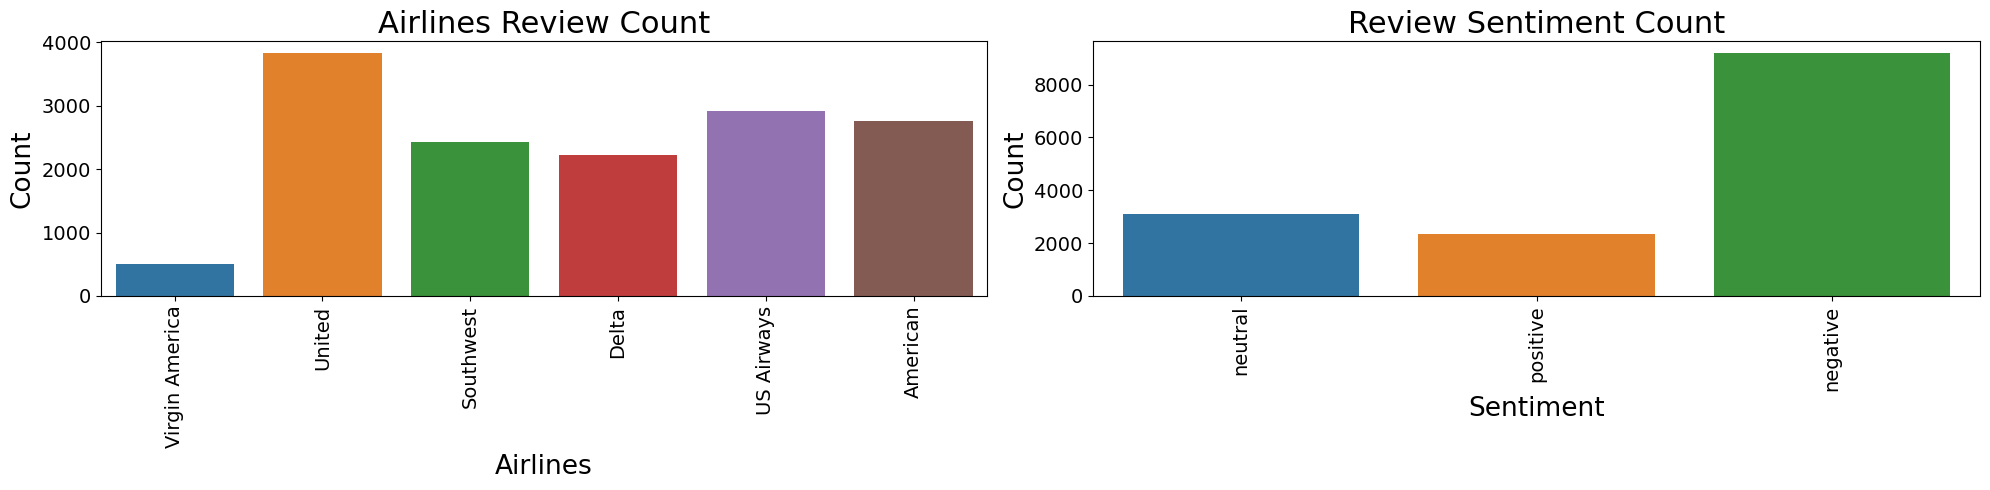

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and font sizes for better readability
figsize = (20, 5)
ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {
    'figure.figsize': figsize,
    'axes.labelsize': labelsize,
    'axes.titlesize': titlesize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}

plt.rcParams.update(params)

# Create subplots
plt.figure()

# First subplot: Count plot for 'airline'
plt.subplot(121)
col = "airline"
xlabel = "Airlines"
ylabel = "Count"

sns.countplot(x=df[col])
plt.title("Airlines Review Count")
plt.xticks(rotation=90)
plt.xlabel(xlabel)
plt.ylabel(ylabel)

# Second subplot: Count plot for 'airline_sentiment'
plt.subplot(122)
col = "airline_sentiment"
xlabel = "Sentiment"
ylabel = "Count"

sns.countplot(x=df[col])  # Ensure to use `x=` for x-axis categorical data
plt.title("Review Sentiment Count")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)

# Display the plots
plt.tight_layout()
plt.show()

Note:
1. Most of the review present here are negative.
2. Highest number of tweets are about "United Airlines", "US Airlines" and "American Airlines"

[]

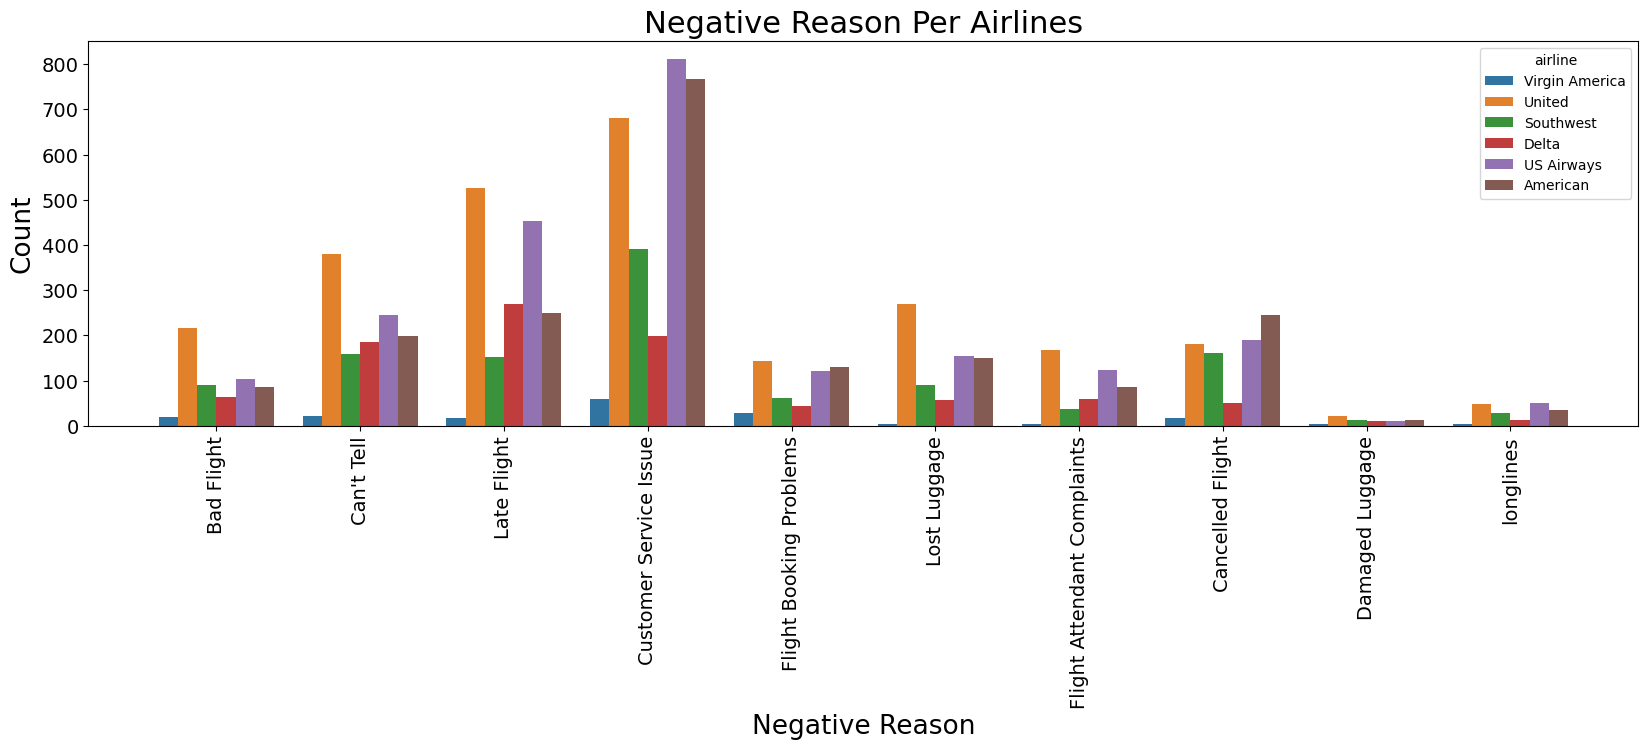

In [ ]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Negative Reason"
ylabel = "Count"

title = "Negative Reason Per Airlines"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col1 = "negativereason"
col2 = "airline"
sns.countplot(x=df[col1], hue=df[col2])
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

Note:
1. Most of the negative tweets are about "Customer Service Issue".

[]

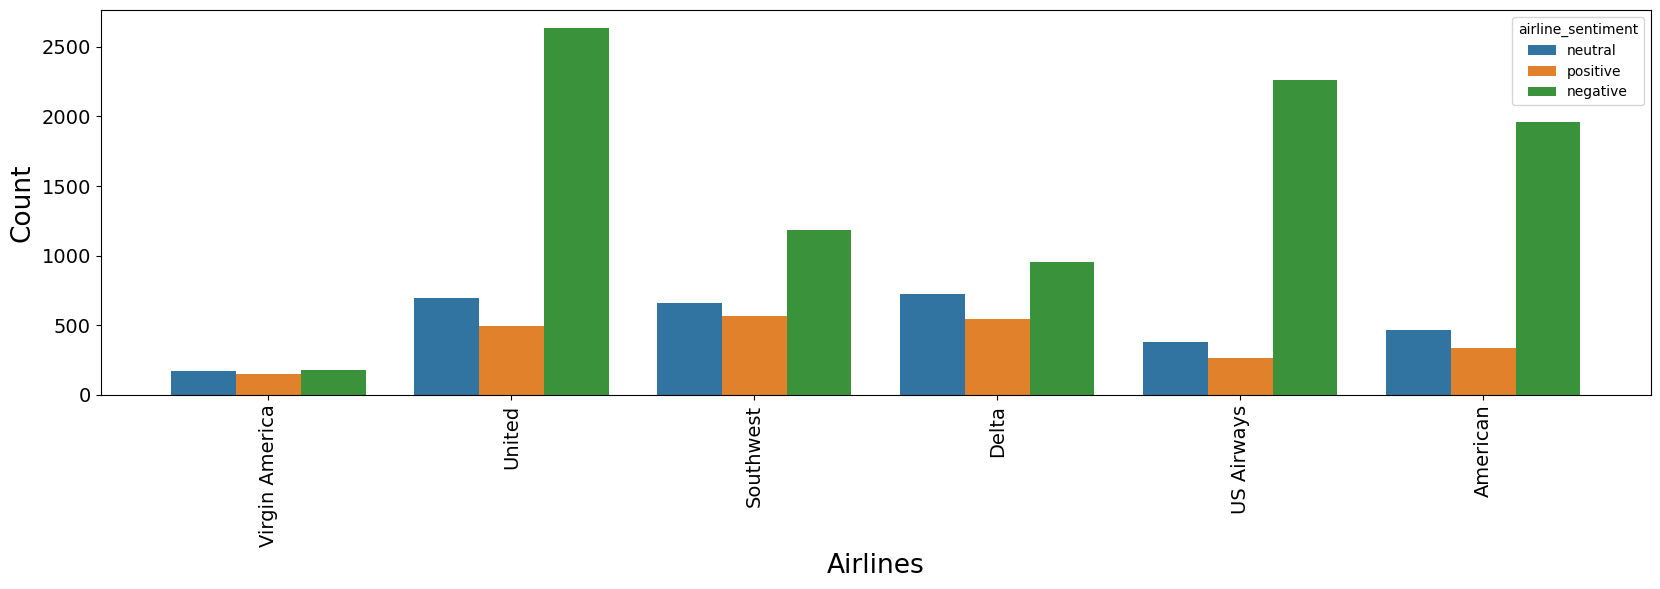

In [ ]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Airlines"
ylabel = "Count"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

plt.figure(figsize=figsize)
col1 = "airline"
col2 = "airline_sentiment"
sns.countplot(x=df[col1], hue=df[col2])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

C:\Users\amans\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


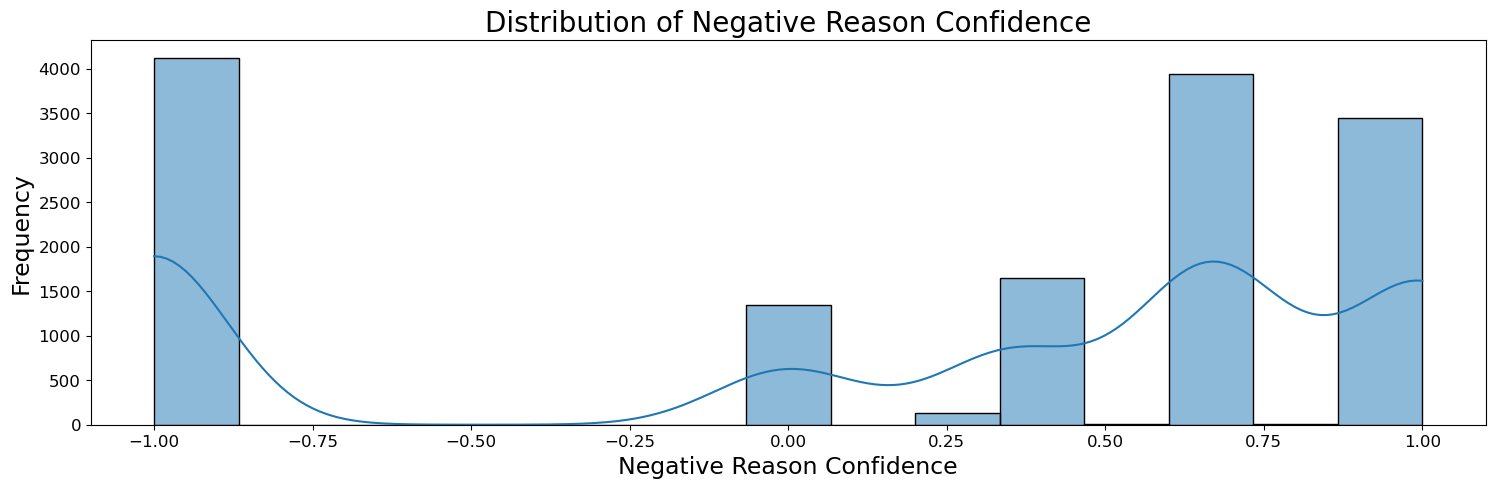

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is already defined and 'negativereason_confidence' column is present
x = df["negativereason_confidence"].fillna(-1)

figsize = (18, 5)
ticksize = 12
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {
    'figure.figsize': figsize,
    'axes.labelsize': labelsize,
    'axes.titlesize': titlesize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}

plt.rcParams.update(params)

# Create a histogram plot
plt.figure()
sns.histplot(x, kde=True)  # kde=True adds a Kernel Density Estimate curve
plt.title("Distribution of Negative Reason Confidence")
plt.xlabel("Negative Reason Confidence")
plt.ylabel("Frequency")
plt.show()

Note:
1. Most of negative confidence values are centered around 0.6-0.9

[]

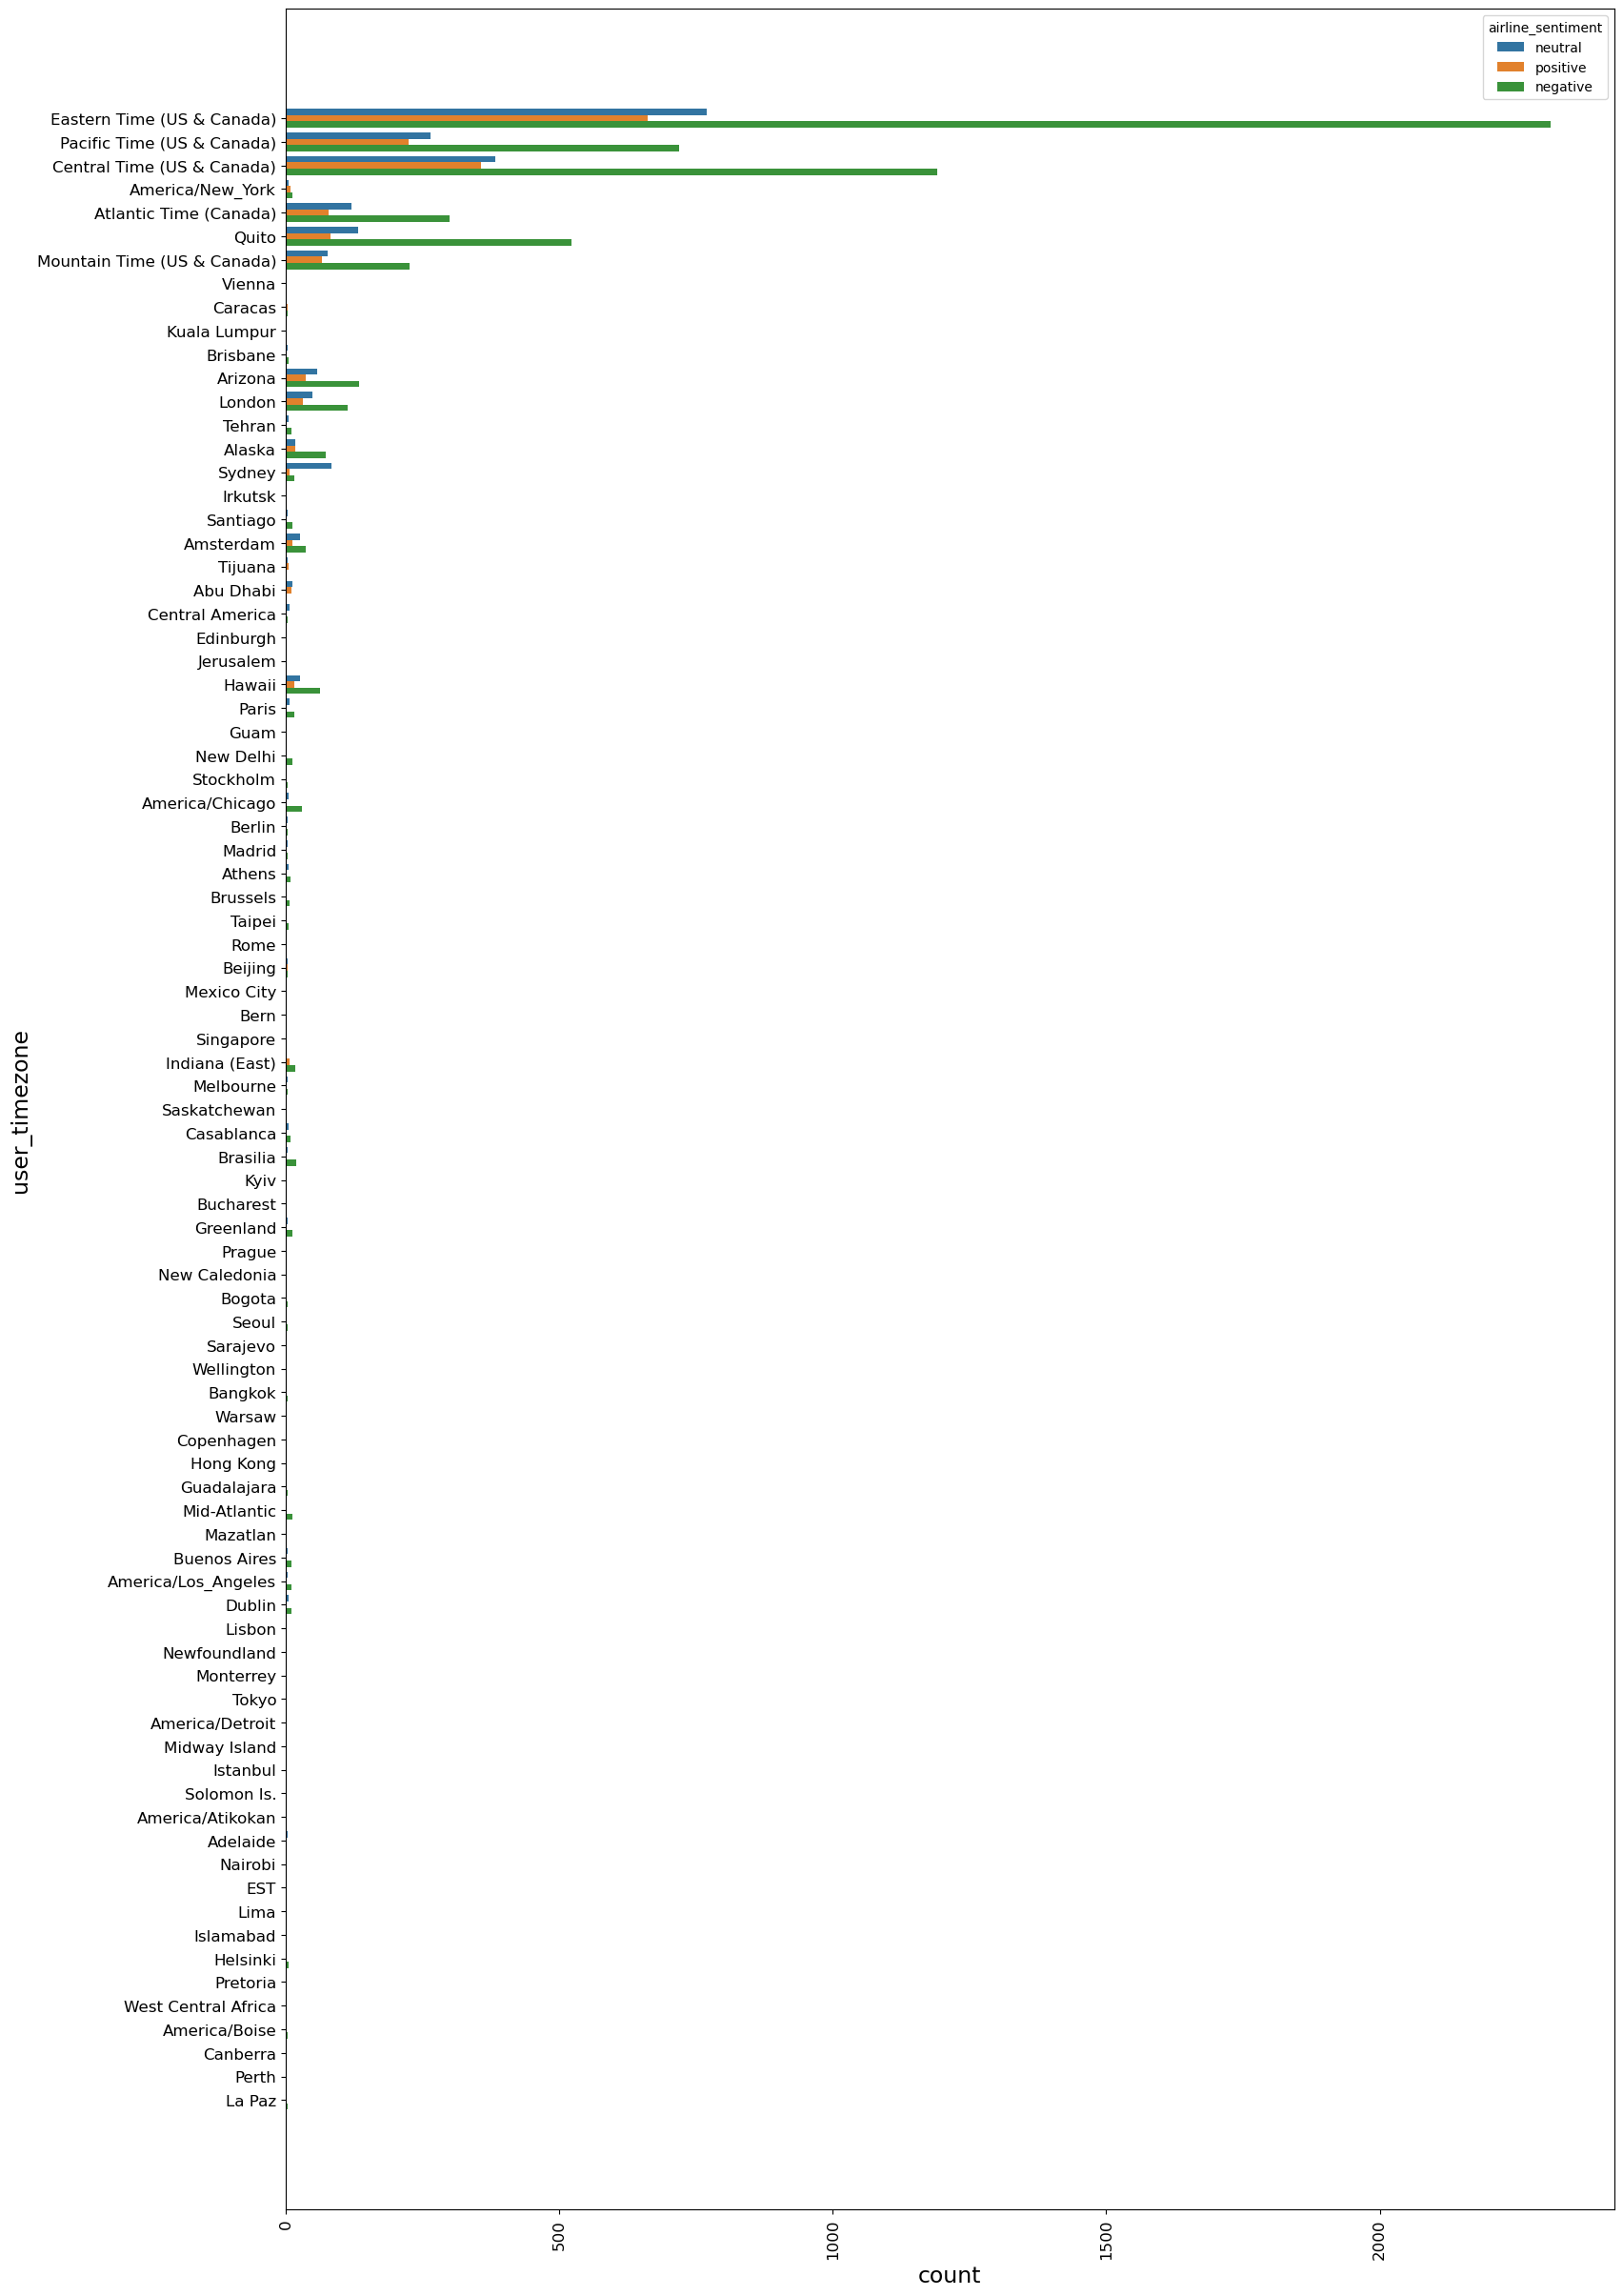

In [ ]:
figsize=(18, 30)

ticksize = 12
titlesize = ticksize + 8
labelsize = ticksize + 5

xlabel = "Airlines"
ylabel = "Count"


params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

col = "user_timezone"
col2 = "airline_sentiment"
sns.countplot(y=df[col], hue=df[col2])
plt.xticks(rotation=90)
plt.plot()

## 4. Training Model

In [ ]:
from nltk.corpus import stopwords

X = df

X["text"] = X["text"].apply(lambda x: BeautifulSoup(x, "lxml").get_text())
X["text"] = X["text"].apply(lambda x: x.lower())
X["text"] = X["text"].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))
X["text"] = X["text"].apply(lambda x: re.sub("\s+", " ", x))

X = X[X["airline_sentiment_confidence"]>0.5]

y = X["airline_sentiment"]
X = X["text"]

stopwords = stopwords.words('english')
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer(stop_words=stopwords)

X = vectorizer.fit_transform(X)

model = RandomForestClassifier(n_estimators=5, n_jobs=-1, class_weight='balanced', random_state=0)
# model = SVC()

print(cross_val_score(model, X, y, cv=3))

C:\Users\amans\AppData\Local\Temp\ipykernel_3316\3507273931.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  X["text"] = X["text"].apply(lambda x: BeautifulSoup(x, "lxml").get_text())


[0.69929196 0.66277859 0.71526765]


## 5. Deep Learning

### 5.1 Output Configuration

In [ ]:
main_model_dir = output_directory + r"models/"
main_log_dir = output_directory + r"logs/"

try:
    os.mkdir(main_model_dir)
except:
    print("Could not create main model directory")

try:
    os.mkdir(main_log_dir)
except:
    print("Could not create main log directory")



model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
log_dir = main_log_dir + time.strftime('%Y-%m-%d %H-%M-%S')


try:
    os.mkdir(model_dir)
except:
    print("Could not create model directory")

try:
    os.mkdir(log_dir)
except:
    print("Could not create log directory")

model_file = model_dir + "{epoch:02d}-val_acc-{val_acc:.2f}-val_loss-{val_loss:.2f}.keras"

Could not create main model directory
Could not create main log directory


### 5.2. Preprocessing

In [ ]:
X = df.text
Y = df.airline_sentiment

label_encoder = LabelEncoder()

Y = label_encoder.fit_transform(Y)

Y = to_categorical(Y)

# Y = Y.reshape(-1, 1)
Y

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

max_words = len(set(" ".join(X_train).split()))
max_len = X_train.apply(lambda x: len(x)).max()

# max_words = 1000
# max_len = 150
max_words, max_len

(12464, 176)

In [ ]:
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_seq = sequence.pad_sequences(X_train_seq, maxlen=max_len)

In [ ]:
def get_weight(y):
    # Ensure y is a 1D array
    y = np.array(y).flatten()

    # Compute class weights
    class_weight_current = cw.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(y),
                                                  y=y)
    return dict(zip(np.unique(y), class_weight_current))

# Assuming Y_train is your array of labels
class_weight = get_weight(Y_train)
print(class_weight)

{0.0: 0.75, 1.0: 1.5}


### 5.3 Model

In [ ]:
def get_rnn_model(num_class=2):
    model.add(Embedding(max_words, 100, input_length=max_len))
    model.add(LSTM(256))

    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(512, activation='relu'))

    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
    else:
        model.add(Dense(1, activation='sigmoid'))
    model.build(input_shape=(None, input_length))
    model.summary()

    return model


def get_cnn_model(num_class=2):
    model = Sequential()
    input_length=max_len
    model.add(Embedding(max_words, 100,input_length=max_len))

    model.add(Conv1D(1024, 3, padding='valid', activation='relu', strides=1))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(2048, activation='relu'))

    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    if num_class>2:
        model.add(Dense(num_class, activation='softmax'))
    else:
        model.add(Dense(1, activation='sigmoid'))
    model.build(input_shape=(None, input_length))
    model.summary()
    return model

In [ ]:
def plot_performance(history=None, figure_directory=None, ylim_pad=[0, 0]):
    xlabel = 'Epoch'
    legends = ['Training', 'Validation']

    plt.figure(figsize=(20, 5))

    y1 = history.history['accuracy']
    y2 = history.history['val_accuracy']

    min_y = min(min(y1), min(y2))-ylim_pad[0]
    max_y = max(max(y1), max(y2))+ylim_pad[0]


    plt.subplot(121)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Accuracy\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()

    y1 = history.history['loss']
    y2 = history.history['val_loss']

    min_y = min(min(y1), min(y2))-ylim_pad[1]
    max_y = max(max(y1), max(y2))+ylim_pad[1]


    plt.subplot(122)

    plt.plot(y1)
    plt.plot(y2)

    plt.title('Model Loss\n'+date_time(1), fontsize=17)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.ylim(min_y, max_y)
    plt.legend(legends, loc='upper left')
    plt.grid()
    if figure_directory:
        plt.savefig(figure_directory+"/history")

    plt.show()


In [ ]:
num_class = 3
model1 = get_rnn_model(num_class=num_class)

C:\Users\amans\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 176, 100)            │       1,246,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         365,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,748,163 (6.67 MB)

 Trainable params: 1,746,627 (6.66 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [ ]:
loss = 'categorical_crossentropy'
# loss = 'binary_crossentropy'
metrics = ['accuracy']

## 10.3. Model Trainning

### 10.3.1. RNN

In [ ]:
# Define date_time function if not already defined
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompiling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)

# Compile the model
model1.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])  # Update metrics as needed

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

# Define file path for model checkpoints
model_file = "../Deep Learning Project/output/models/{epoch:02d}-val_accuracy-{val_accuracy:.2f}-val_loss-{val_loss:.2f}.keras"

# Set callbacks
checkpoint = ModelCheckpoint(
    model_file,
    monitor='val_accuracy',  # Use 'val_accuracy' for accuracy
    save_best_only=True,
    mode='max',  # Use 'max' for accuracy
    verbose=1
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    verbose=1,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=1,
    verbose=1,
    mode='min'  # Use 'min' for loss
)

callbacks = [checkpoint, reduce_lr, early_stopping]

print("Training Model ...\n")

# Train the model
history1 = model1.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split,
    class_weight=class_weight
)

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Training", date_time(1))

Starting...

Timestamp: 2024-08-28 02:01:59


Compiling Model ...

Training Model ...

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4464 - loss: 1.6096
Epoch 1: val_accuracy improved from -inf to 0.62756, saving model to ../Deep Learning Project/output/models/01-val_accuracy-0.63-val_loss-0.93.keras
78/78 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.4470 - loss: 1.6077 - val_accuracy: 0.6276 - val_loss: 0.9308 - learning_rate: 0.0010
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6188 - loss: 0.9929
Epoch 2: val_accuracy did not improve from 0.62756
78/78 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6192 - loss: 0.9917 - val_accuracy: 0.6276 - val_loss: 0.8751 - learning_rate: 0.0010
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7736 - loss: 0.5589
Epoch 3: val_accuracy did not improve from 0.62756

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
78/78 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0

#### 10.3.1.2  Visualization

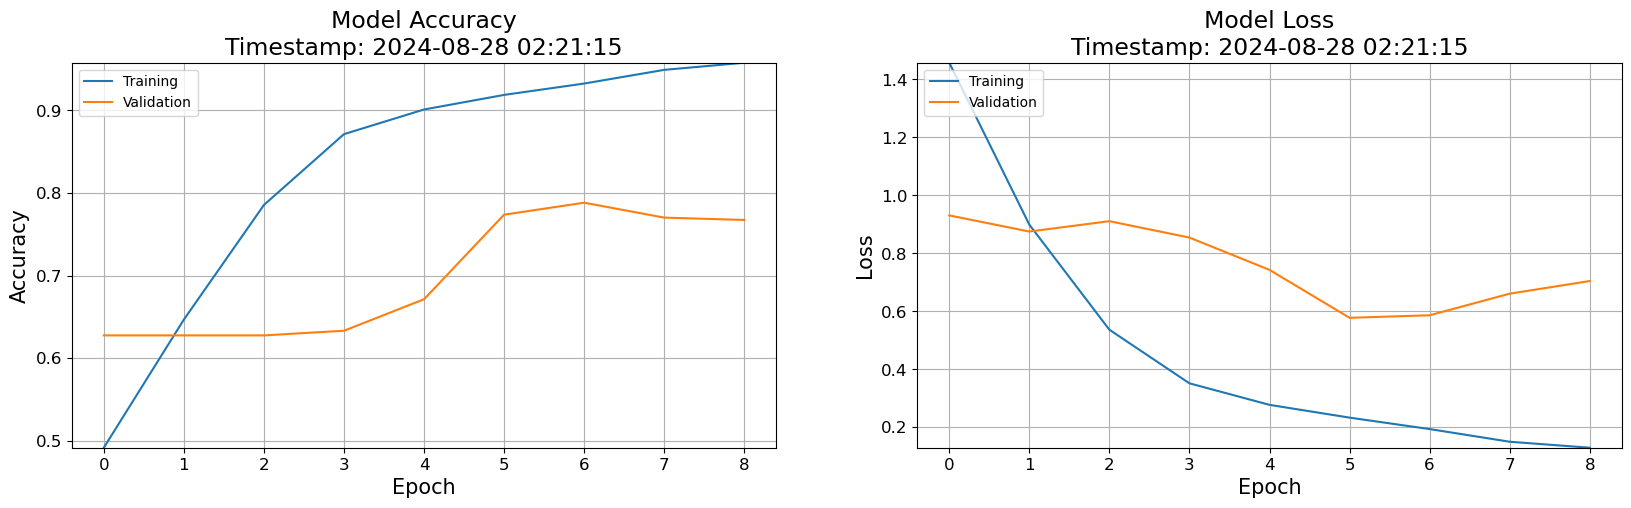

In [ ]:
plot_performance(history=history1)

### 10.3.2. CNN

In [ ]:
num_class = 3
model2 = get_cnn_model(num_class=num_class)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)             │ (None, 176, 100)            │       1,246,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_11 (Conv1D)                   │ (None, 174, 1024)           │         308,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_4               │ (None, 1024)                │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2048)                │       2,099,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │           6,147 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,672,259 (14.01 MB)

 Trainable params: 3,666,115 (13.99 MB)

 Non-trainable params: 6,144 (24.00 KB)

In [ ]:
print("Starting...\n")

start_time = time.time()
print(date_time(1))

print("\n\nCompliling Model ...\n")
learning_rate = 0.001
optimizer = Adam(learning_rate)
# optimizer = Adam()

model2.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

verbose = 1
epochs = 100
batch_size = 128
validation_split = 0.2

print("Trainning Model ...\n")

history2 = model2.fit(
    X_train_seq,
    Y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=verbose,
    callbacks=callbacks,
    validation_split=validation_split,
    class_weight =class_weight
    )

elapsed_time = time.time() - start_time
elapsed_time = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))

print("\nElapsed Time: " + elapsed_time)
print("Completed Model Trainning", date_time(1))

Starting...

Timestamp: 2024-08-28 02:38:43


Compliling Model ...

Trainning Model ...

Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.4465 - loss: 1.6485
Epoch 1: val_accuracy did not improve from 0.78827
78/78 ━━━━━━━━━━━━━━━━━━━━ 49s 589ms/step - accuracy: 0.4472 - loss: 1.6462 - val_accuracy: 0.6284 - val_loss: 0.9230 - learning_rate: 0.0010
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.6312 - loss: 0.9779
Epoch 2: val_accuracy did not improve from 0.78827

Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
78/78 ━━━━━━━━━━━━━━━━━━━━ 47s 604ms/step - accuracy: 0.6316 - loss: 0.9770 - val_accuracy: 0.3568 - val_loss: 0.9992 - learning_rate: 0.0010
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.7309 - loss: 0.6775
Epoch 3: val_accuracy did not improve from 0.78827

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
78/78 ━━━━━━━━━━━━━━━━━━━━ 47s 604ms/step - accuracy: 0.731

#### 10.3.1.2 Visualization

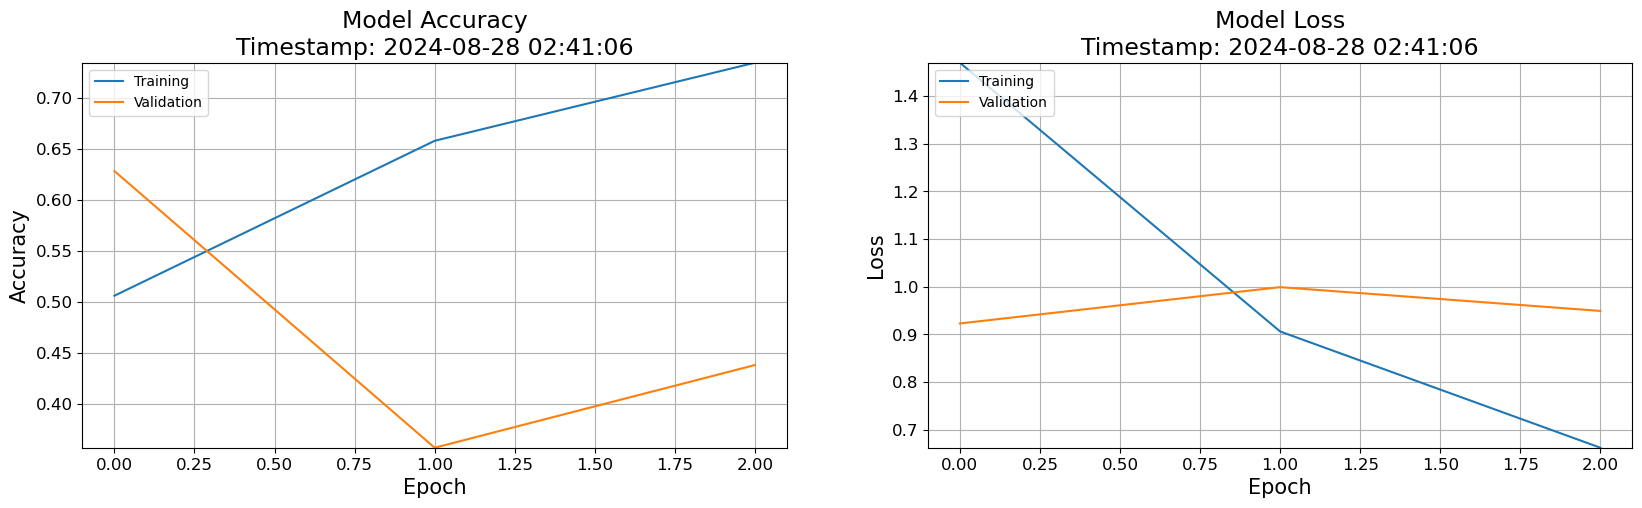

In [ ]:
plot_performance(history=history2)


## 10.5 Inference/ Prediction

In [ ]:
test_X_seq = tokenizer.texts_to_sequences(X_test)
test_X_seq = sequence.pad_sequences(test_X_seq, maxlen=max_len)
accuracy1 = model1.evaluate(test_X_seq, Y_test)
accuracy2 = model2.evaluate(test_X_seq, Y_test)

69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 150ms/step - accuracy: 0.7766 - loss: 0.5685
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6371 - loss: 0.9246


### 10.5.1 Evaluation

In [ ]:
print("Model Performance of RNN (Test Accuracy):")
print('Accuracy: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy1[1]*100, accuracy1[0]))

print("\nModel Performance of CNN (Test Accuracy):")
print('v: {:0.2f}%\nLoss: {:0.3f}\n'.format(accuracy2[1]*100, accuracy2[0]))

Model Performance of RNN (Test Accuracy):
Accuracy: 77.09%
Loss: 0.582


Model Performance of CNN (Test Accuracy):
v: 63.16%
Loss: 0.926



In [ ]:

# Predict probabilities
ypreds1_probs = model1.predict(test_X_seq, verbose=1)
ypreds2_probs = model2.predict(test_X_seq, verbose=1)

# Convert probabilities to class predictions
ypreds1 = np.argmax(ypreds1_probs, axis=1)
ypreds2 = np.argmax(ypreds2_probs, axis=1)

# Display predictions
print("Predictions from model1:", ypreds1)
print("Predictions from model2:", ypreds2)


69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
Predictions from model1: [0 0 0 ... 0 2 1]
Predictions from model2: [0 0 0 ... 0 0 0]


In [ ]:
def plot_model_performace(result):
    sns.set_style("ticks")
    figsize=(22, 6)

    ticksize = 12
    titlesize = ticksize + 8
    labelsize = ticksize + 5

    xlabel = "Model"
    ylabel = "Score"

    title = "Model Performance"

    params = {'figure.figsize' : figsize,
              'axes.labelsize' : labelsize,
              'axes.titlesize' : titlesize,
              'xtick.labelsize': ticksize,
              'ytick.labelsize': ticksize}

    plt.rcParams.update(params)

    col1 = "model"
    col2 = "score"
    sns.barplot(x=col1, y=col2, data=result)
    plt.title(title.title())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.grid()
    plt.plot()
    plt.show()
    print(result)


In [ ]:
# print(classification_report(Y_test, ypreds1))

In [ ]:
# print(classification_report(Y_test, ypreds2))

#### 10.5.1.2 Visualization

In [ ]:
# plot_confusion_matrix(Y_test, ypreds2, title="CNN")

In [ ]:

# Create individual DataFrames
result = pd.DataFrame({'model': ['RNN'], 'score': [accuracy1[1] * 100]})
row2 = pd.DataFrame({'model': ['CNN'], 'score': [accuracy2[1] * 100]})

# Concatenate DataFrames
result = pd.concat([row2, result], ignore_index=True)

# Display result
print(result)


  model      score
0   CNN  63.160294
1   RNN  77.094716


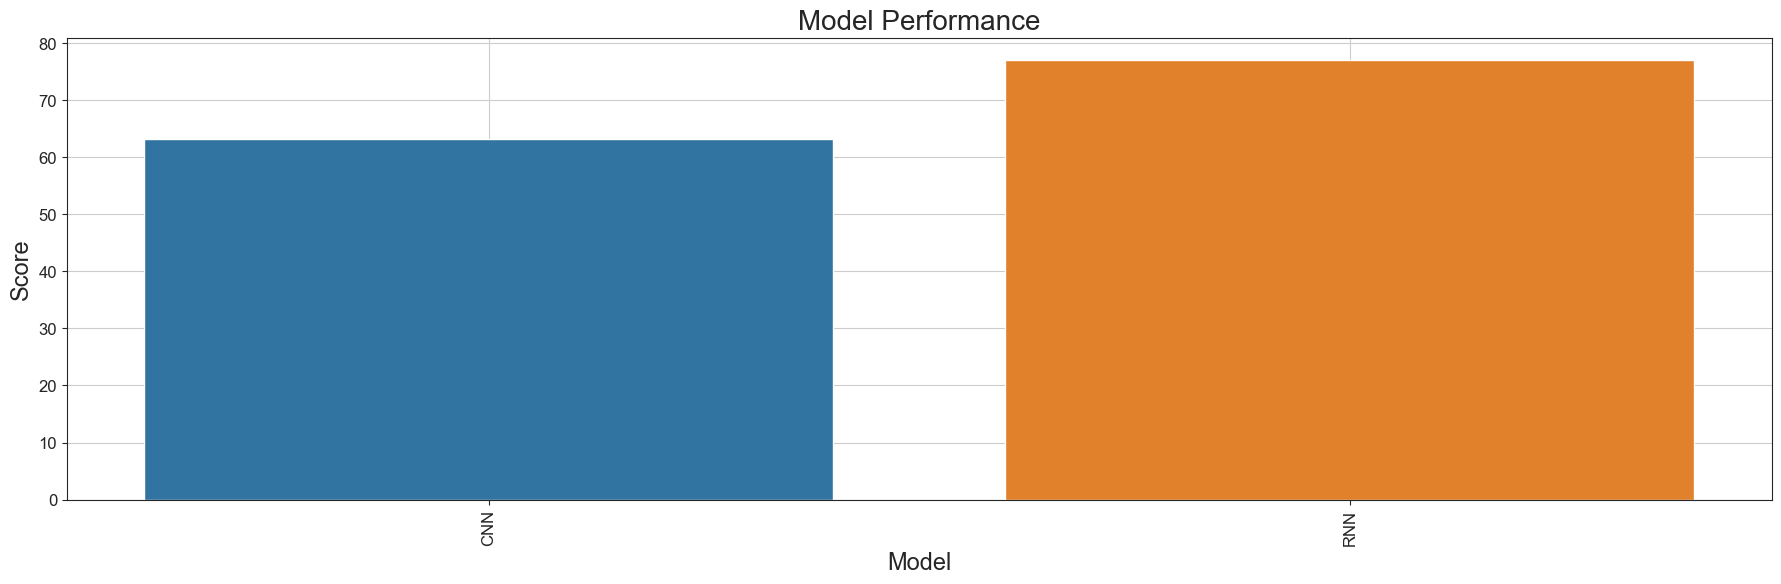

  model      score
0   CNN  63.160294
1   RNN  77.094716


In [ ]:
plot_model_performace(result)

# Reference:
1. [Text Preprocessing and Machine Learning Modeling](https://www.kaggle.com/futurist/text-preprocessing-and-machine-learning-modeling)
2. [keras mlp cnn test for text classification](https://www.kaggle.com/jacklinggu/keras-mlp-cnn-test-for-text-classification)